<a href="https://colab.research.google.com/github/SanjeevRK21/Project-Stock_Risk_Analysis/blob/main/Stock_Risk_Analysis_D2V1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# Here we are mounting our drive to this project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


In [5]:
# Here we are defining our project paths
project_path = '/content/drive/My Drive/Project_1'
dailylog_path = f'{project_path}/daily_log_returns.csv'
returns = pd.read_csv(dailylog_path, index_col = 0, parse_dates = True)


In [6]:
# Here we are calculating daily volatility (i.e average log change in the stock seen daily over the period present in the csv file)
daily_volatile = returns.std()
daily_volatile

,0
log_returns,0.021137


In [7]:
# Here we are calculating the annual_volatility (i.e the average log change in the stock seen annually over a period of the time that is present in the csv file)
annual_volatile = daily_volatile * np.sqrt(252) # since 252 trading days are there in an year
annual_volatile

,0
log_returns,0.335534


            log_returns
Price                  
2020-01-03          NaN
2020-01-06          NaN
2020-01-07          NaN
2020-01-08          NaN
2020-01-09          NaN
...                 ...
2023-12-22     0.147581
2023-12-26     0.134122
2023-12-27     0.130902
2023-12-28     0.125278
2023-12-29     0.126527

[1005 rows x 1 columns]
       log_returns
count   976.000000
mean      0.308572
std       0.142219
min       0.125278
25%       0.212886
50%       0.285261
75%       0.353637
max       0.956476


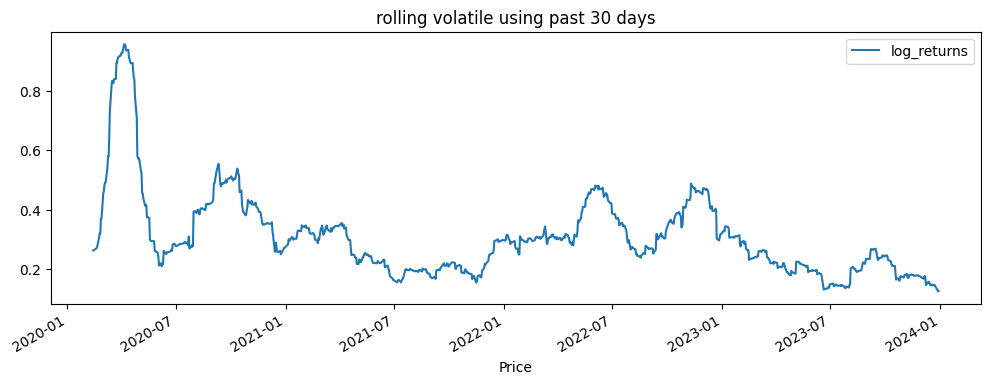

In [15]:
# Here we are seeing the rolling volatility(i.e we can see the volatility of the stock over a perticular window and then predict what its annual volatility
# will be seeing the last 30 days or last 30 datas present in your dataset. anything above 0.4 is shows the stock is higly volatile and is a risky period
rolling_volatile = returns.rolling(window=30).std() * np.sqrt(252)
print(rolling_volatile)
print(rolling_volatile.describe())
rolling_volatile.plot(title = 'rolling volatile using past 30 days', figsize=(12,4))
plt.show()
#the graph basically shows the stock was highly volatile during 2020's mostly due to the COVID and presently (2024) it has been stabalised. It does not mean
# the stock has earned a large profits or it has crashed completly, it just says how volatile or how risky it is during a perticular time period.

In [18]:
# Okay as you can see up, the dates are the index in the dataset and this index is named as Prices, i will change the index naming to date
returns.index.name = 'date'
returns

,log_returns
date,
2020-01-03,-0.009770
2020-01-06,0.007937
2020-01-07,-0.004714
2020-01-08,0.015958
2020-01-09,0.021019
...,...
2023-12-22,-0.005563
2023-12-26,-0.002845
2023-12-27,0.000518


**Sharpe Ratio**

In [33]:
#Now lets see what is Sharpe Ratio
'''
Sharpe Ratio basicaly tells us how much returns we got per unit of the risk or volatility that occured.
for that we are gonna use the formula: annual returns/ annual volatilty
here annual returns is basically the mean of returns * 252
and annual volatility we have calculated as annual_volatile = returns.std() * np.sqrt(252)
if the ratio is <0 - bad, 0 to 0.5 - weak, 0.5 to 1 - decent, 1 to 2 - good, >2 - exceelent
as of now lets calculate the sharpe ratio from jan 2020 to jan 2021, and lets see how covid affected apple's market
'''
import pandas as pd
import numpy as np
returns_series = returns.squeeze() # this is done to convert returns to series from dataframe
#returns_series
start_date = '2020-01-01'
end_date = '2021-01-01'
returns_2020 = returns_series.loc[start_date:end_date]
#returns_2020
annual_returns_2020 = returns_2020.mean() * 252
#print(annual_returns_2020)
annual_volatility_2020 = returns_2020.std() * np.sqrt(252)
#print(annual_volatility_2020)
sharpe_ratio_2020 = annual_returns_2020/annual_volatility_2020
print(sharpe_ratio_2020)


1.2369329718676305


**Sortino Ratio**

In [32]:
#Now lets see what is Sortino Ratio
'''
Sortino Ratio is the same as Sharpee ratio but here we only take the downside values that is below a certain target, lets take that target as 0 and anything less than 0
are a downside values
hence annual_downside_2020 = returns_2020[returns_2020 < 0]
and annual_downside_volatile_2020 = annual_downside_2020.std() * np.sqrt(252)
Sortino Ratio = annual_returns_2020/annual_downside_volatile_2020
the numerator of both Sortino and Sharpee will remain same only the denominator in Sharpee will change.
if the Sortino ratio is <0 - bad, 0 to 0.5 - weak, 0.5 to 1 - decent, 1 to 2 - good, >2 - exceelent
'''
annual_downside_2020 = returns_2020[returns_2020<0]
#print(annual_downside_2020)
annual_downside_volatility_2020 = annual_downside_2020.std() * np.sqrt(252)
#print(annual_downside_volatile_2020)
sortino_ratio_2020 = annual_returns_2020/annual_downside_volatility_2020
print(sortino_ratio_2020)


1.606242857196385


In [36]:
# Now lets save the calculated parameters in a csv file
metrics = pd.DataFrame({
    2020:[annual_returns_2020, annual_volatility_2020, sharpe_ratio_2020, sortino_ratio_2020]
},
   index = ['Annual Returns','Annual Volatility','Sharpe Ratio','Sortino Ratio']
)
#metrics

metrics.to_csv(f'{project_path}/Risk_Metrics.csv', index = False)